# CLUSTERING ALGORITHM FOR IRIS DATASET

## NAME: SOORAJ ARUN

### OVERVIEW

150 flower samples from three species make up the Iris dataset, which has four features: petal length, petal width, sepal length, and sepal width. The objective of a clustering project is to group the flowers according to these characteristics using unsupervised learning approaches such as K-Means or DBSCAN, and then evaluate if the algorithm can correctly identify the three species without the need of the target labels. Data pretreatment for the project includes visual exploration, feature scaling, and selecting a suitable clustering technique to assess the outcomes.

### OBJECTIVE 

The goal of this project is to identify flower groups based on their attributes (sepal length, sepal width, petal length, and petal width) by using hierarchical clustering and K-Means clustering techniques on the Iris dataset. Comparing how successfully the two unsupervised learning techniques cluster the flowers into different groups and assessing how closely these clusters match the dataset's real species are the objectives.

### DATASET: IRIS DATA FROM SKLEARN

### IMPORTING LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.cluster import KMeans

from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch


from sklearn.metrics import silhouette_score

from sklearn.preprocessing import MinMaxScaler


import warnings
warnings.filterwarnings("ignore")

In [3]:
from sklearn.datasets import load_iris
iris = load_iris()

In [5]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [7]:
# Convert to DataFrame
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['species'] = iris.target

In [9]:
# Drop the species column
features = df.drop(columns=['species'])

In [11]:
df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'species'],
      dtype='object')

In [13]:
# Dropping column
df = df.drop('species',axis=1)

In [15]:
df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

In [17]:
len(df.columns)

4

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [21]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [23]:
df.dtypes

sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
dtype: object

In [25]:
df.shape

(150, 4)

In [27]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [29]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
145    False
146    False
147    False
148    False
149    False
Length: 150, dtype: bool

In [31]:
df.duplicated().sum()

1

In [33]:
df = df.drop_duplicates()

In [35]:
df.duplicated().sum()

0

### FINDING NUMBER OF CLUSTERS 

Text(0, 0.5, 'petal length')

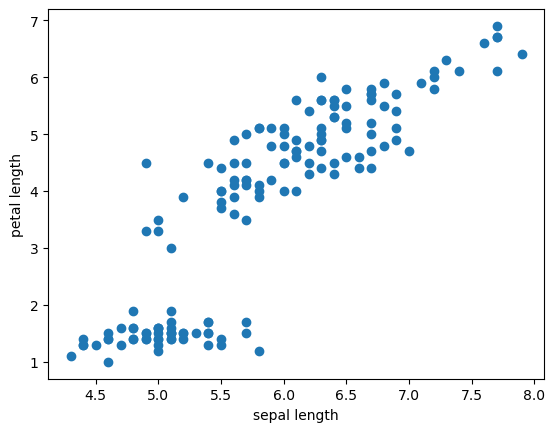

In [37]:
## Drawing scatterplot to find the number of clusters
plt.scatter(df['sepal length (cm)'],df['petal length (cm)'])
plt.xlabel('sepal length')
plt.ylabel('petal length')

### ELBOW METHOD

In [39]:
sse = []  #WCSS
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['sepal length (cm)','sepal length (cm)','sepal width (cm)','petal width (cm)']])
    sse.append(km.inertia_)

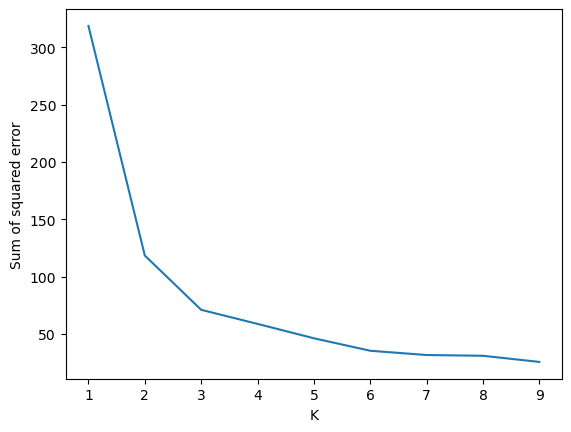

In [41]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

NUMBER OF CLUSTERS : 3

### SCALING

In [43]:
# Applying MinMax scaler

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df)

### IMPLEMENTING CLUSTERING METHODS

### K MEANS CLUSTERING 

KMeans clustering is an unsupervised machine learning algorithm that partitions the data into k clusters based on feature similarity. It assigns each data point to the nearest cluster centroid and iterates to minimize the sum of squared distances between data points and their assigned cluster centers. 

The steps of the KMeans algorithm are: Choose k initial centroids randomly. Assign each data point to the nearest centroid. Recompute the centroids based on the assigned data points. Repeat steps 2 and 3 until convergence (centroids don't change significantly).

Why suitable: The Iris dataset has well-separated flower species based on features like sepal length, sepal width, petal length, and petal width. Since the dataset has inherent groupings (species of flowers), KMeans can effectively group similar data points together.The Iris dataset has well-separated flower species based on features like sepal length, sepal width, petal length, and petal width. Since the dataset has inherent groupings (species of flowers), KMeans can effectively group similar data points together.

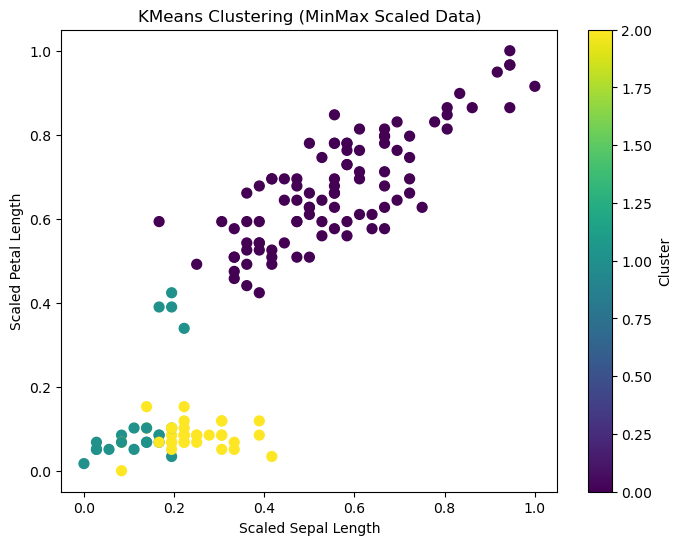

In [45]:
# KMeans Clustering
# Apply KMeans Clustering
kmeans = KMeans(n_clusters=3, random_state=42)  # Assuming 3 clusters
kmeans_labels = kmeans.fit_predict(scaled_data)


# Add cluster labels to the DataFrame
df['kmeans_labels'] = kmeans_labels


# Scatter plot to visualize clusters
plt.figure(figsize=(8, 6))
plt.scatter(scaled_data[:, 0], scaled_data[:, 2], c=kmeans_labels, cmap='viridis', s=50)
plt.title('KMeans Clustering (MinMax Scaled Data)')
plt.xlabel('Scaled Sepal Length')
plt.ylabel('Scaled Petal Length')
plt.colorbar(label='Cluster')
plt.show()

### HIERARCHICAL CLUSTERING

Hierarchical clustering is an unsupervised machine learning algorithm that builds a hierarchy of clusters either by:

Agglomerative (Bottom-Up): Starts with each data point as its own cluster and iteratively merges the closest clustersved.

Divisive (Top-Down): Starts with all data points in one cluster and recursively splits them.

Agglomerative clustering is more commonly used. The process continues until all points are grouped into a single cluster or until the desired number of clusters is achieved.


Why Hierarchical Clustering Might Be Suitable for the Iris Dataset: Hierarchical clustering doesn't require the number of clusters to be pre-defined. It is useful for understanding the data structure and dendrograms can help visualize how clusters are formed. The Iris dataset, with its relatively small size and clear separation between classes, works well with hierarchical clustering.

In [47]:
# Apply Hierarchical Clustering
hc = AgglomerativeClustering(n_clusters=3, linkage='ward', metric='euclidean')
hc_labels = hc.fit_predict(scaled_data)  # Fit and predict cluster labels

# Add cluster labels to the DataFrame
df['hc_labels'] = hc_labels

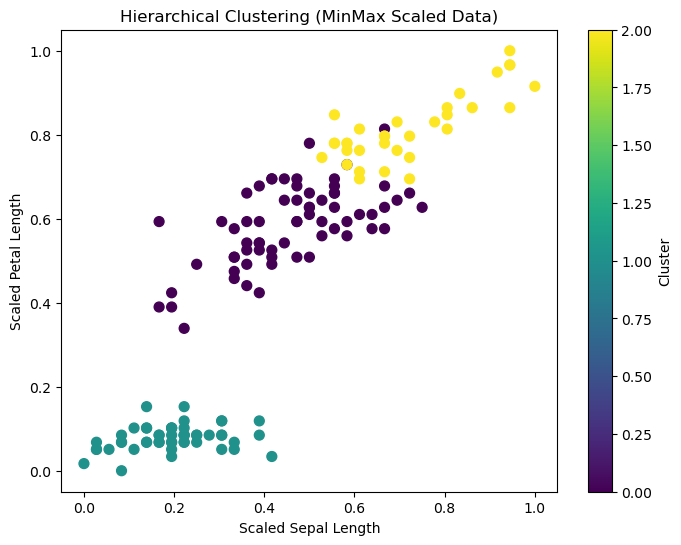

In [49]:
# Scatter plot to visualize clusters
plt.figure(figsize=(8, 6))
plt.scatter(scaled_data[:, 0], scaled_data[:, 2], c=hc_labels, cmap='viridis', s=50)
plt.title('Hierarchical Clustering (MinMax Scaled Data)')
plt.xlabel('Scaled Sepal Length')
plt.ylabel('Scaled Petal Length')
plt.colorbar(label='Cluster')
plt.show()

### VALUATION

In [51]:
# Calculate Silhouette Score
silhouette = silhouette_score(scaled_data, kmeans_labels)
print(f"Silhouette Score (KMeans with MinMax Scaling): {silhouette:.4f}")

Silhouette Score (KMeans with MinMax Scaling): 0.4968


In [53]:
# Calculate Silhouette Score
silhouette = silhouette_score(scaled_data, hc_labels)
print(f"Silhouette Score (Hierarchical Clustering with MinMax Scaling): {silhouette:.4f}")

Silhouette Score (Hierarchical Clustering with MinMax Scaling): 0.5064
